# RSNA Intracranial Hemorrhage Detection 

<b>Competition Overview</b><br/><br/>
Intracranial hemorrhage, bleeding that occurs inside the cranium, is a serious health problem requiring rapid and often intensive medical treatment. For example, intracranial hemorrhages account for approximately 10% of strokes in the U.S., where stroke is the fifth-leading cause of death. Identifying the location and type of any hemorrhage present is a critical step in treating the patient.

Diagnosis requires an urgent procedure. When a patient shows acute neurological symptoms such as severe headache or loss of consciousness, highly trained specialists review medical images of the patient’s cranium to look for the presence, location and type of hemorrhage. The process is complicated and often time consuming.

<b>What am i predicting?</b><br/><br/>
In this competition our goal is to predict intracranial hemorrhage and its subtypes. Given an image the we need to predict probablity of each subtype. This indicates its a multilabel classification problem.

<b>Competition Evaluation Metric</b><br/><br/>
Evaluation metric is weighted multi-label logarithmic loss. So for given image we need to predict probality for each subtype. There is also an any label, which indicates that a hemorrhage of ANY kind exists in the image. The any label is weighted more highly than specific hemorrhage sub-types.

<b>Note:</b>The weights for each subtype for calculating weighted multi-label logarithmic loss is **not** given as part of the competition.

<b>Dataset Description</b>

The dataset is divided into two parts

1. Train
2. Test

**1. Train**
Number of rows: 40,45,548 records.
Number of columns: 2

Columns:

**Id**: An image Id. Each Id corresponds to a unique image, and will contain an underscore.

Example: ID_28fbab7eb_epidural. So the Id consists of two parts one is image file id ID_28fbab7eb and the other is sub type name

**Label**: The target label whether that sub-type of hemorrhage (or any hemorrhage in the case of any) exists in the indicated image. 1 --> Exists and 0 --> Doesn't exist.

**2. Test**
Number of rows: 4,71,270 records.

Columns:

**Id**: An image Id. Each Id corresponds to a unique image, and will contain an underscore.

Example: ID_28fbab7eb_epidural. So the Id consists of two parts one is image file id ID_28fbab7eb and the other is sub type name

**DICOM Images**

DICOM (Digital Imaging and Communications in Medicine) is a standard for handling, storing, printing, and transmitting information in medical imaging. It includes a file format definition and a network communications protocol.

The communication protocol is an application protocol that uses TCP/IP to communicate between systems. DICOM files can be exchanged between two entities that are capable of receiving image and patient data in DICOM format.

The National Electrical Manufacturers Association (NEMA) holds the copyright to this standard. It was developed by the DICOM Standards Committee, whose members are also partly members of NEMA.

In [1]:
import numpy as np
import pandas as pd
import pydicom
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_folder = '../input/rsna-intracranial-hemorrhage-detection/'

In [3]:
path_train_img = input_folder + 'stage_1_train_images/'
path_test_img = input_folder + 'stage_1_test_images/'

### Loading Data

In [4]:
train_df = pd.read_csv(input_folder + 'stage_1_train.csv')
train_df.head()

ID  Label
0          ID_63eb1e259_epidural      0
1  ID_63eb1e259_intraparenchymal      0
2  ID_63eb1e259_intraventricular      0
3      ID_63eb1e259_subarachnoid      0
4          ID_63eb1e259_subdural      0

In [5]:
# extract subtype
train_df['sub_type'] = train_df['ID'].apply(lambda x: x.split('_')[-1])
# extract filename
train_df['file_name'] = train_df['ID'].apply(lambda x: '_'.join(x.split('_')[:2]) + '.dcm')
train_df.head()

ID  Label          sub_type         file_name
0          ID_63eb1e259_epidural      0          epidural  ID_63eb1e259.dcm
1  ID_63eb1e259_intraparenchymal      0  intraparenchymal  ID_63eb1e259.dcm
2  ID_63eb1e259_intraventricular      0  intraventricular  ID_63eb1e259.dcm
3      ID_63eb1e259_subarachnoid      0      subarachnoid  ID_63eb1e259.dcm
4          ID_63eb1e259_subdural      0          subdural  ID_63eb1e259.dcm

In [6]:
train_df.shape

(4045572, 4)

In [7]:
print("Number of train images availabe:", len(os.listdir(path_train_img)))

Number of train images availabe: 674258


In [8]:
train_final_df = pd.pivot_table(train_df.drop(columns='ID'), index="file_name", \
                                columns="sub_type", values="Label")
train_final_df.head()

sub_type          any  epidural  intraparenchymal  intraventricular  \
file_name                                                             
ID_000039fa0.dcm    0         0                 0                 0   
ID_00005679d.dcm    0         0                 0                 0   
ID_00008ce3c.dcm    0         0                 0                 0   
ID_0000950d7.dcm    0         0                 0                 0   
ID_0000aee4b.dcm    0         0                 0                 0   

sub_type          subarachnoid  subdural  
file_name                                 
ID_000039fa0.dcm             0         0  
ID_00005679d.dcm             0         0  
ID_00008ce3c.dcm             0         0  
ID_0000950d7.dcm             0         0  
ID_0000aee4b.dcm             0         0

In [9]:
train_final_df.shape

(674258, 6)

### Visualization

In [10]:
dicom = pydicom.read_file(path_train_img + 'ID_ffff922b9.dcm')
print(dicom)

(0008, 0018) SOP Instance UID                    UI: ID_ffff922b9
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_5964c5e5'
(0020, 000d) Study Instance UID                  UI: ID_b47ca0ad05
(0020, 000e) Series Instance UID                 UI: ID_6d2a9b2810
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-126.408875', '-126.408875', '-235.611511']
(0020, 0037) Image Orientation (Patient)         DS: ['1.000000', '0.000000', '0.000000', '0.000000', '1.000000', '0.000000']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.494750976563', '0.494750976563']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101)

### Constructing Image from DICOM Files

**Extracting Window width, Window center, Slope, Intercept**

In [11]:
# (0028, 1050) Window Center 
dicom[('0028', '1050')]

(0028, 1050) Window Center                       DS: "35.000000"

In [12]:
# etract value
dicom[('0028', '1050')].value

"35.000000"

In [13]:
def get_dicom_field_value(key, dicom):
    """
    @param key: key is tuple
    @param dicom: dicom file
    """
    return dicom[key].value

In [14]:
window_center = int(get_dicom_field_value(('0028', '1050'), dicom))
window_width = int(get_dicom_field_value(('0028', '1051'), dicom))
window_intercept = int(get_dicom_field_value(('0028', '1052'), dicom))
window_slope = int(get_dicom_field_value(('0028', '1053'), dicom))
window_center, window_width, window_intercept, window_slope

(35, 135, -1024, 1)

In [15]:
def get_windowed_image(image, wc,ww, intercept, slope):
    img = (image*slope +intercept)
    img_min = wc - ww//2
    img_max = wc + ww//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img 

In [16]:
# display the scaled image
windowed_image = get_windowed_image(dicom.pixel_array, window_center, window_width, \
                                    window_intercept, window_slope)

print(windowed_image)

[[-32 -32 -32 ... -32 -32 -32]
 [-32 -32 -32 ... -32 -32 -32]
 [-32 -32 -32 ... -32 -32 -32]
 ...
 [-32 -32 -32 ... -32 -32 -32]
 [-32 -32 -32 ... -32 -32 -32]
 [-32 -32 -32 ... -32 -32 -32]]


In [17]:
def get_scaled_windowed_image(img):
    """
    Get scaled image
    1. Convert to float
    2. Rescale to 0-255
    3. Convert to unit8
    """
    img_2d = img.astype(float)
    img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
    img_2d_scaled = np.uint8(img_2d_scaled)
    return img_2d_scaled

In [18]:
scaled_image = get_scaled_windowed_image(windowed_image)

**Orginal Image**

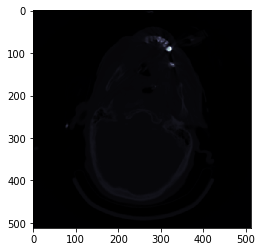

In [19]:
plt.imshow(dicom.pixel_array, cmap=plt.cm.bone)
plt.show()

**Windowed Image**

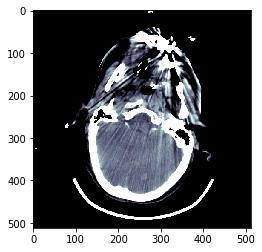

In [20]:
plt.imshow(windowed_image, cmap=plt.cm.bone)
plt.show()

**Scaled Image**

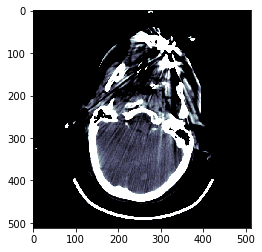

In [21]:
plt.imshow(scaled_image, cmap=plt.cm.bone, vmin=0, vmax=255)
plt.show()

In [22]:
def display_dicom_image(file):
    di = pydicom.read_file(path_train_img + file)
    plt.subplot(1,3,1)
    plt.imshow(di.pixel_array, cmap='gray')
    plt.title('Raw Image')
    plt.subplot(1,3,2)
    windowed_image = get_windowed_image(di.pixel_array, window_center, window_width, \
                                    window_intercept, window_slope)
    plt.imshow(windowed_image, cmap='gray')
    plt.title('Windowed Image')
    plt.subplot(1,3,3)
    plt.imshow(get_scaled_windowed_image(windowed_image), cmap='gray')
    plt.title('Scaled Image')
    plt.show()
    print(train_final_df.loc[file])

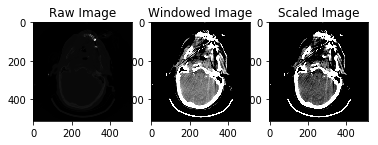

sub_type
any                 1
epidural            0
intraparenchymal    0
intraventricular    1
subarachnoid        0
subdural            0
Name: ID_ffff922b9.dcm, dtype: int64


In [23]:
display_dicom_image('ID_ffff922b9.dcm')

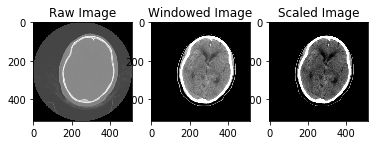

sub_type
any                 1
epidural            0
intraparenchymal    0
intraventricular    1
subarachnoid        1
subdural            0
Name: ID_0005d340e.dcm, dtype: int64


In [24]:
display_dicom_image('ID_0005d340e.dcm')

**Brain Subdural Windowing**

Source: 

https://www.kaggle.com/jhoward/from-prototyping-to-submission-fastai

https://www.kaggle.com/reppic/gradient-sigmoid-windowing

In [25]:
def correct_dcm(dcm):
    x = dcm.pixel_array + 1000
    px_mode = 4096
    x[x>=px_mode] = x[x>=px_mode] - px_mode
    dcm.PixelData = x.tobytes()
    dcm.RescaleIntercept = -1000

def window_image(dcm, window_center, window_width):
    
    if (dcm.BitsStored == 12) and (dcm.PixelRepresentation == 0) and (int(dcm.RescaleIntercept) > -100):
        correct_dcm(dcm)
    
    img = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img = np.clip(img, img_min, img_max)

    return img

def bsb_window(dcm):
    brain_img = window_image(dcm, 40, 80)
    subdural_img = window_image(dcm, 80, 200)
    soft_img = window_image(dcm, 40, 380)
    
    brain_img = (brain_img - 0) / 80
    subdural_img = (subdural_img - (-20)) / 200
    soft_img = (soft_img - (-150)) / 380
    bsb_img = np.array([brain_img, subdural_img, soft_img]).transpose(1,2,0)

    return bsb_img


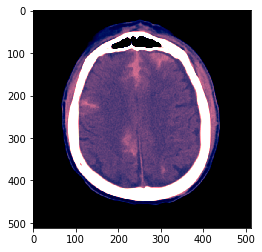

In [26]:
dicom = pydicom.dcmread(path_train_img + 'ID_5c8b5d701' + '.dcm')
plt.imshow(bsb_window(dicom), cmap=plt.cm.bone);

In [27]:
bsb_window(dicom).shape

(512, 512, 3)

In [28]:
def window_with_correction(dcm, window_center, window_width):
    if (dcm.BitsStored == 12) and (dcm.PixelRepresentation == 0) and (int(dcm.RescaleIntercept) > -100):
        correct_dcm(dcm)
    img = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img = np.clip(img, img_min, img_max)
    return img

def window_without_correction(dcm, window_center, window_width):
    img = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img = np.clip(img, img_min, img_max)
    return img

def window_testing(img, window):
    brain_img = window(img, 40, 80)
    subdural_img = window(img, 80, 200)
    soft_img = window(img, 40, 380)
    
    brain_img = (brain_img - 0) / 80
    subdural_img = (subdural_img - (-20)) / 200
    soft_img = (soft_img - (-150)) / 380
    bsb_img = np.array([brain_img, subdural_img, soft_img]).transpose(1,2,0)

    return bsb_img

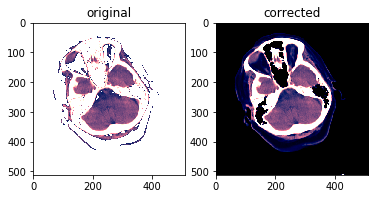

In [29]:
dicom = pydicom.dcmread(path_train_img + "ID_036db39b7" + ".dcm")

fig, ax = plt.subplots(1, 2)

ax[0].imshow(window_testing(dicom, window_without_correction), cmap=plt.cm.bone);
ax[0].set_title("original")
ax[1].imshow(window_testing(dicom, window_with_correction), cmap=plt.cm.bone);
ax[1].set_title("corrected");

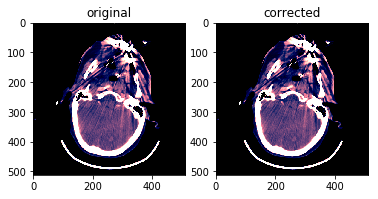

In [30]:
dicom = pydicom.dcmread(path_train_img + "ID_ffff922b9.dcm")

fig, ax = plt.subplots(1, 2)

ax[0].imshow(window_testing(dicom, window_without_correction), cmap=plt.cm.bone);
ax[0].set_title("original")
ax[1].imshow(window_testing(dicom, window_with_correction), cmap=plt.cm.bone);
ax[1].set_title("corrected");

In [31]:
def get_corrected_bsb_window(dcm, window_center, window_width):
    #------ Correct Dicom Image ------------#
    if (dcm.BitsStored == 12) and (dcm.PixelRepresentation == 0) and (int(dcm.RescaleIntercept) > -100):
        x = dcm.pixel_array + 1000
        px_mode = 4096
        x[x>=px_mode] = x[x>=px_mode] - px_mode
        dcm.PixelData = x.tobytes()
        dcm.RescaleIntercept = -1000
    
    #------ Windowing ----------------------#
    img = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img = np.clip(img, img_min, img_max)
    return img

def get_rgb_image(img):
    brain_img = get_corrected_bsb_window(img, 40, 80)
    subdural_img = get_corrected_bsb_window(img, 80, 200)
    soft_img = get_corrected_bsb_window(img, 40, 380)
    
    brain_img = (brain_img - 0) / 80
    subdural_img = (subdural_img - (-20)) / 200
    soft_img = (soft_img - (-150)) / 380
    bsb_img = np.array([brain_img, subdural_img, soft_img]).transpose(1,2,0)
    
    return bsb_img

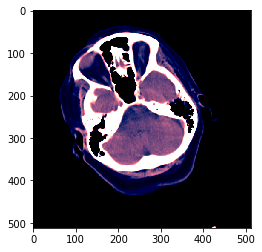

In [32]:
dicom = pydicom.dcmread(path_train_img + "ID_036db39b7" + ".dcm")
plt.imshow(get_rgb_image(dicom))

In [33]:
def _read(path, desired_size):

    dcm = pydicom.dcmread(path)
    
    try:
        img = get_rgb_image(dcm)
    except:
        img = np.zeros(desired_size)
    
    
    img = cv2.resize(img, desired_size[:2], interpolation=cv2.INTER_LINEAR)
    
    return img

In [34]:
_read(path_train_img + "ID_036db39b7" + ".dcm", (224, 224)).shape

(224, 224, 3)

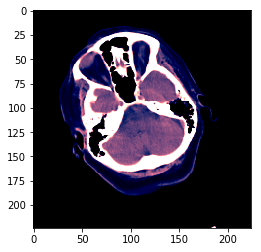

In [35]:
plt.imshow(
    _read(path_train_img + "ID_036db39b7" + ".dcm", (224, 224)), cmap=plt.cm.bone
);

In [36]:
def display_dicom_image(file):
    di = pydicom.read_file(path_train_img + file)
    plt.figure(figsize=(16, 6))
    plt.subplot(1,4,1)
    plt.imshow(di.pixel_array, cmap='gray')
    plt.title('Raw Image')
    plt.subplot(1,4,2)
    windowed_image = get_windowed_image(di.pixel_array, window_center, window_width, \
                                    window_intercept, window_slope)
    plt.imshow(windowed_image, cmap='gray')
    plt.title('Windowed Image')
    plt.subplot(1,4,3)
    plt.imshow(get_scaled_windowed_image(windowed_image), cmap='gray')
    plt.title('Scaled Image')
    
    plt.subplot(1,4,4)
    plt.imshow(_read(path_train_img + file, desired_size=(512, 512)), cmap='gray')
    plt.title('Brain Subdural Windowing')
    
    plt.show()
    print(train_final_df.loc[file])

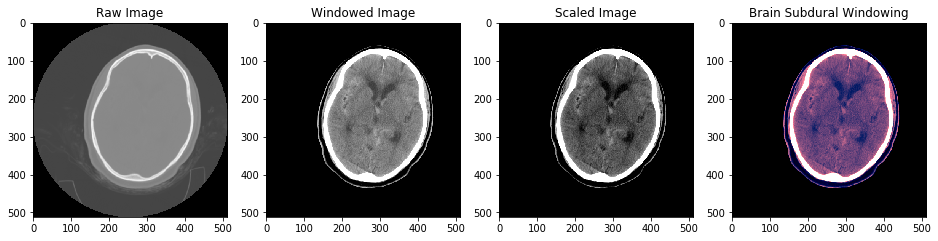

sub_type
any                 1
epidural            0
intraparenchymal    0
intraventricular    1
subarachnoid        1
subdural            0
Name: ID_0005d340e.dcm, dtype: int64


In [37]:
display_dicom_image('ID_0005d340e.dcm')